In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [87]:

#load first dataset 
import pandas as pd
first_diabetes_dataset = pd.read_csv("first_diabetes_dataset.csv")
count_diabetes_0 = (first_diabetes_dataset['Diabetes'] == 0).sum()
count_diabetes_1 = (first_diabetes_dataset['Diabetes'] == 1).sum()
count_diabetes_2 = (first_diabetes_dataset['Diabetes'] == 2).sum()

# # Step 5: Print results
# print("Total rows after deleting duplicates where diabetes==0:", total_rows)
print("Total rows with diabetes == 0:", count_diabetes_0)
print("Total rows with diabetes == 1:", count_diabetes_1)
print("Total rows with diabetes == 2:", count_diabetes_2)


print("Rows in second dataset:", len(first_diabetes_dataset))
first_diabetes_dataset['Diabetes'] = first_diabetes_dataset['Diabetes'].replace({2: 1})
first_diabetes_dataset.to_csv("first_diabetes_dataset.csv", index=False)
print(first_diabetes_dataset['Diabetes'].value_counts())


Total rows with diabetes == 0: 213703
Total rows with diabetes == 1: 39977
Total rows with diabetes == 2: 0
Rows in second dataset: 253680
Diabetes
0    213703
1     39977
Name: count, dtype: int64


In [88]:
#load first dataset
import pandas as pd

# Load datasets
first_diabetes_dataset = pd.read_csv("first_diabetes_dataset.csv")
second_diabetes_dataset = pd.read_csv("second_diabetes_dataset.csv")
third_diabetes_dataset = pd.read_csv("third_diabetes_dataset.csv")

print("\nColumns in second dataset:")
print(second_diabetes_dataset.columns.tolist())
print("\nColumns in third dataset:")
print(third_diabetes_dataset.columns.tolist())


columns_first = set(first_diabetes_dataset.columns)
columns_second = set(second_diabetes_dataset.columns)
columns_third = set(third_diabetes_dataset.columns)


if columns_first == columns_second == columns_third:
   
    diabetes_dataset = pd.concat(
        [first_diabetes_dataset, second_diabetes_dataset, third_diabetes_dataset],
        ignore_index=True
    )
    print("Total rows after combining:", len(diabetes_dataset))

    
    diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
    print("Combined dataset saved as 'diabetes_dataset.csv'.")
else:
    print("Error: The columns in the datasets do not match and cannot be combined.")



Columns in second dataset:
['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']

Columns in third dataset:
['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']
Total rows after combining: 578052
Combined dataset saved as 'diabetes_dataset.csv'.


In [89]:
#Data cleaning
#Check for Missing Values
#Check for Duplicates
#Data Type Checking & Fixing
#Save Cleaned Dataset

In [90]:
#check the null value if founded replace with rounded mean value
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")
print("Dataset shape:", diabetes_dataset.shape)
print("Column names:", diabetes_dataset.columns.tolist())
finding_missing_values = diabetes_dataset.isnull().sum()

if finding_missing_values.sum() > 0:
    print("Missing values found. Filling with rounded mean values...")
    
    for column in diabetes_dataset.select_dtypes(include='number').columns:
        if diabetes_dataset[column].isnull().sum() > 0:
            mean_val = diabetes_dataset[column].mean()
            rounded_mean = 1 if mean_val >= 0.5 else 0
            diabetes_dataset[column].fillna(rounded_mean, inplace=True)
            print(f"→ Column '{column}': Filled missing values with {rounded_mean} (mean was {mean_val:.3f})")
            diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
            print("Cleaned dataset saved successfully.")
else:
    print("No missing values found.")





Dataset shape: (578052, 14)
Column names: ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'Age']
No missing values found.


In [91]:
#Grouping the BMI

diabetes_dataset = pd.read_csv("diabetes_dataset.csv")


bmi_labels = [
    'Underweight', 'Normal weight', 'Overweight',
    'Obese Class I', 'Obese Class II', 'Obese Class III'
]

#
if diabetes_dataset['BMI'].isin(bmi_labels).all():
    print("BMI is already categorized. Skipping binning step.")
else:
    
    diabetes_dataset['BMI'] = pd.to_numeric(diabetes_dataset['BMI'], errors='coerce')
    
   
    bmi_bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
    
   
    diabetes_dataset['BMI'] = pd.cut(
        diabetes_dataset['BMI'],
        bins=bmi_bins,
        labels=bmi_labels,
        right=False,
        include_lowest=True
    )
    print("BMI has been categorized.")


diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
print("Dataset saved successfully.")

BMI has been categorized.
Dataset saved successfully.


In [92]:
#delete row with no diabetes which is similar


# duplicate_rows = diabetes_dataset[diabetes_dataset.duplicated() & (diabetes_dataset['Diabetes'] == 0)]

# diabetes_dataset = diabetes_dataset.drop(index=duplicate_rows.index)

# # Step 4: Count after removal
# total_rows = len(diabetes_dataset)
count_diabetes_0 = (diabetes_dataset['Diabetes'] == 0).sum()
count_diabetes_1 = (diabetes_dataset['Diabetes'] == 1).sum()

# # Step 5: Print results
# print("Total rows after deleting duplicates where diabetes==0:", total_rows)
print("Total rows with diabetes == 0:", count_diabetes_0)
print("Total rows with diabetes == 1:", count_diabetes_1)
# diabetes_dataset.to_csv("diabetes_dataset.csv", index=False)
# print("Cleaned dataset saved successfully.")

Total rows with diabetes == 0: 467383
Total rows with diabetes == 1: 110669


In [93]:


numeric_columns = diabetes_dataset.select_dtypes(include=[np.number]).columns
exclude_cols = ['BMI', 'Age']
columns_to_check = [col for col in numeric_columns if col not in exclude_cols]


for column in columns_to_check:
    invalid_mask = ~diabetes_dataset[column].isin([0, 1])
    invalid_values = diabetes_dataset[column][invalid_mask]
    
    if not invalid_values.empty:
        print(f"\Invalid values found in column '{column}':")
        print(invalid_values)
        valid_mean = round(diabetes_dataset[column][~invalid_mask].mean())
        diabetes_dataset.loc[invalid_mask, column] = valid_mean
        
        print(f"→ Replaced invalid values with rounded mean: {valid_mean}")
    else:
        print(f"All values in column '{column}' are valid (0 or 1).")

All values in column 'Diabetes' are valid (0 or 1).
All values in column 'HighBP' are valid (0 or 1).
All values in column 'HighChol' are valid (0 or 1).
All values in column 'CholCheck' are valid (0 or 1).
All values in column 'Smoker' are valid (0 or 1).
All values in column 'Stroke' are valid (0 or 1).
All values in column 'HeartDiseaseorAttack' are valid (0 or 1).
All values in column 'PhysActivity' are valid (0 or 1).


<>:11: SyntaxWarning:

invalid escape sequence '\I'

<>:11: SyntaxWarning:

invalid escape sequence '\I'

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_15124\1357958220.py:11: SyntaxWarning:

invalid escape sequence '\I'



All values in column 'Fruits' are valid (0 or 1).
All values in column 'HvyAlcoholConsump' are valid (0 or 1).
All values in column 'DiffWalk' are valid (0 or 1).
All values in column 'Sex' are valid (0 or 1).


In [94]:
#data analysis
#Summary statistics
#Class Balance (Target Variable)
#Correlation Matrix
#Feature Distribution
# Cross-Analysis (Diabetes vs. Other Features)

            Diabetes         HighBP       HighChol      CholCheck  \
count  578052.000000  578052.000000  578052.000000  578052.000000   
mean        0.191452       0.445444       0.436544       0.964209   
std         0.393444       0.497015       0.495957       0.185769   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  578052.000000  578052.000000         578052.000000  578052.000000   
mean        0.447095       0.043212              0.100744       0.750000   
std         0.497194       0.203335              0.300989       0.433013   
min         0.000000       0.000000              0.000000       0.000000  

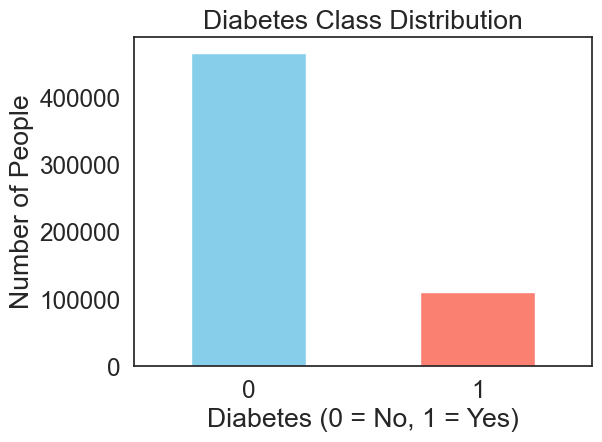

In [95]:
# Summary statistics
# Load the cleaned dataset
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")
print(diabetes_dataset.describe())


# Print exact count of each class
print(diabetes_dataset['Diabetes'].value_counts())

# Plot exact counts (not proportions)
diabetes_dataset['Diabetes'].value_counts().plot(kind='bar', title='Diabetes Class Distribution', color=['skyblue', 'salmon'])
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Diabetes                 int64
HighBP                   int64
HighChol                 int64
CholCheck                int64
BMI                     object
Smoker                   int64
Stroke                   int64
HeartDiseaseorAttack     int64
PhysActivity             int64
Fruits                   int64
HvyAlcoholConsump        int64
DiffWalk                 int64
Sex                      int64
Age                      int64
dtype: object


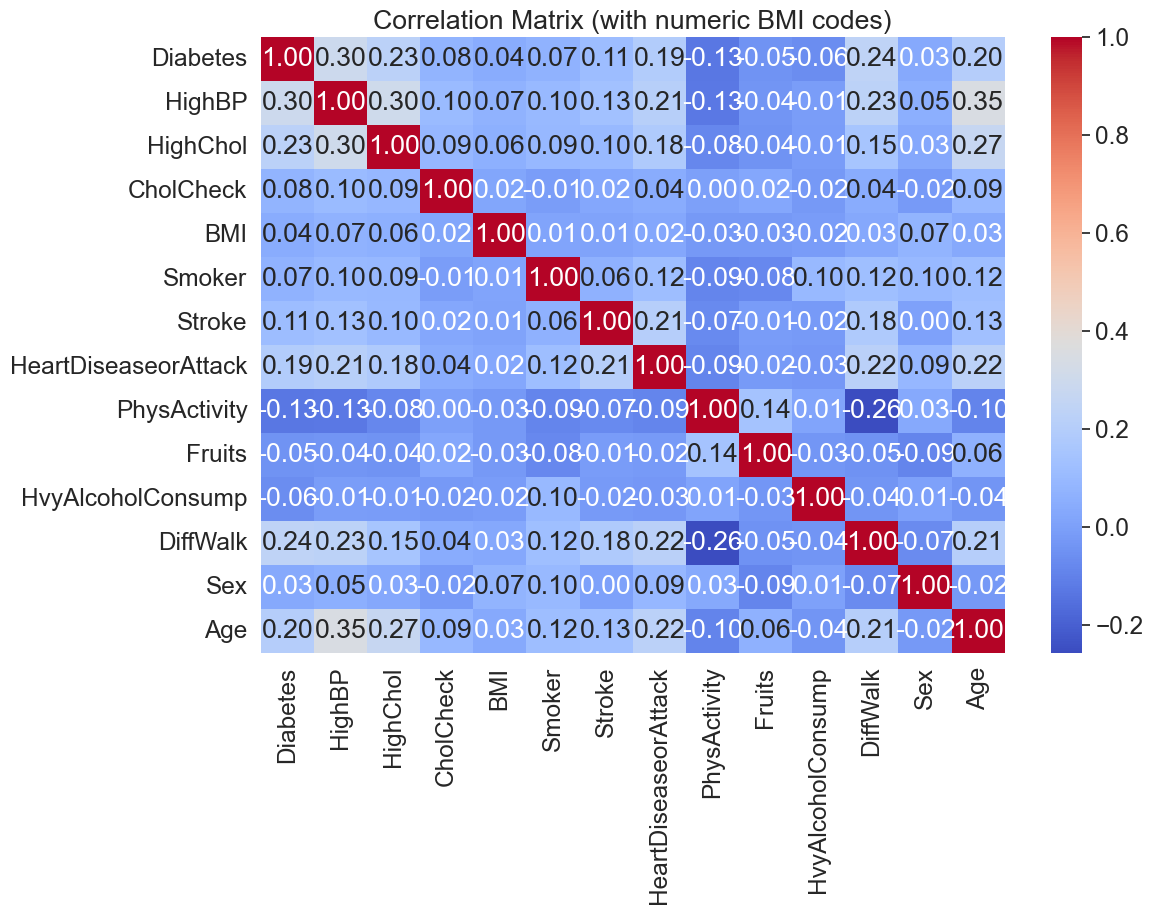

In [96]:
#Plot correlation heatmap
print(diabetes_dataset.dtypes)
 # Step 1: Convert 'BMI' column to category
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].astype('category')

# Step 2: Replace it with corresponding numeric codes
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].cat.codes
numeric_data = diabetes_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (with numeric BMI codes)')
plt.show()

In [97]:
import pandas as pd
import plotly.express as px

# Step 1: Convert 'BMI' column to category and then to codes
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].astype('category')
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].cat.codes

# Step 2: Select numeric data and compute correlation
numeric_data = diabetes_dataset.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr().round(2)

# Step 3: Convert the correlation matrix to long format
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# Step 4: Plot using Plotly Express
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    title='Correlation Matrix (with numeric BMI codes)'
)

fig.update_layout(width=800, height=600)
fig.show()

In [98]:
#Distribution of BMI


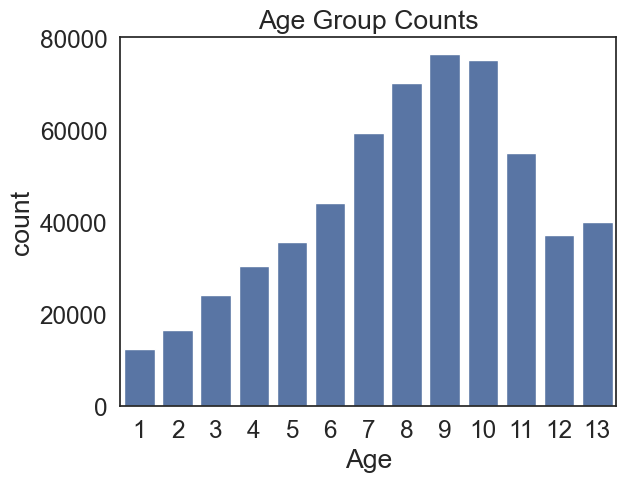

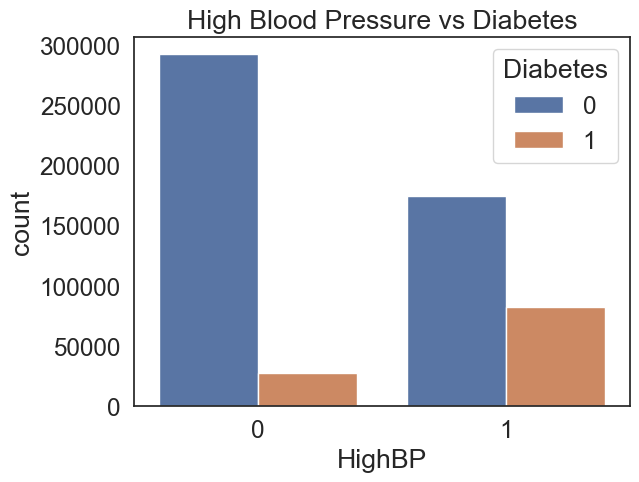

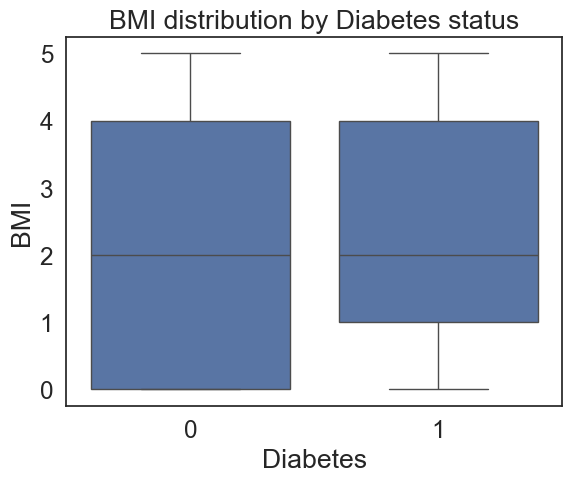

In [99]:


# Example: Count plot for Age
sns.countplot(data=diabetes_dataset, x='Age')
plt.title('Age Group Counts')
plt.show()

#Cross-Analysis (Diabetes vs. Other Features)
# Diabetes vs HighBP
sns.countplot(x='HighBP', hue='Diabetes', data=diabetes_dataset)
plt.title('High Blood Pressure vs Diabetes')
plt.show()

# Diabetes vs BMI (Boxplot)
sns.boxplot(x='Diabetes', y='BMI', data=diabetes_dataset)
plt.title('BMI distribution by Diabetes status')
plt.show()

In [100]:
#model creation
#xgboost data model
#Random forest
#svm 


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE 
from collections import Counter

In [102]:
# Load and split data
X = diabetes_dataset.drop('Diabetes', axis=1)
y = diabetes_dataset['Diabetes']

# Split data (80% test, 20% train as in your original)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.80, random_state=42
)

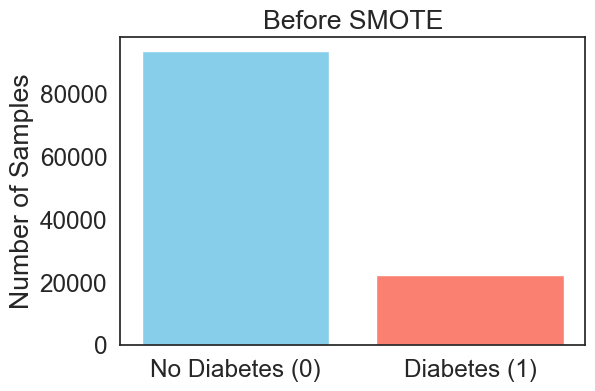

Class distribution after SMOTE:
Counter({0: 93416, 1: 65391})


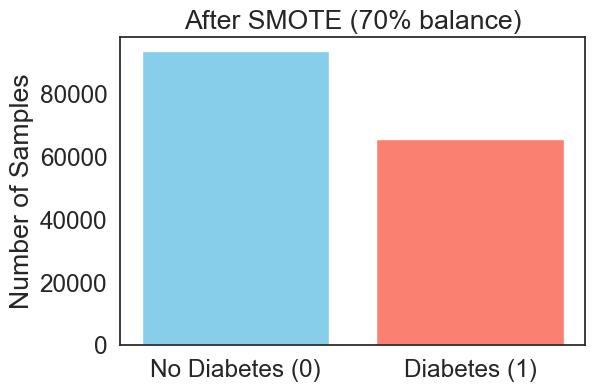

In [103]:


from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Partial oversampling (70%)
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Prepare list for results
results = []

def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    results.append({
        'Model': name,
        'Accuracy (%)': round(accuracy * 100, 2)
    })

# Before SMOTE plot
plt.figure(figsize=(6, 4))
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], [Counter(y_train)[0], Counter(y_train)[1]], color=['skyblue', 'salmon'])
plt.title("Before SMOTE")
plt.ylabel("Number of Samples")
plt.show()

# Class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_balanced))

# After SMOTE plot
plt.figure(figsize=(6, 4))
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], [Counter(y_train_balanced)[0], Counter(y_train_balanced)[1]], color=['skyblue', 'salmon'])
plt.title("After SMOTE (70% balance)")
plt.ylabel("Number of Samples")
plt.show()



c:\Users\L E N O V O\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:20:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




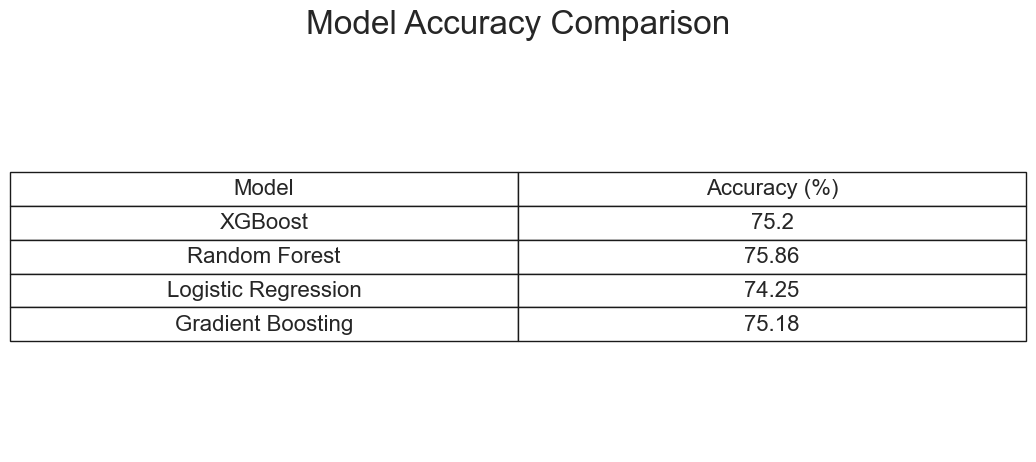

In [104]:
# Model 1: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb_model.predict(X_test)
evaluate_model("XGBoost", y_test, xgb_pred)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(X_test)
evaluate_model("Random Forest", y_test, rf_pred)

# Model 3: Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_balanced, y_train_balanced)
log_pred = log_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, log_pred)

# Model 4: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
gb_pred = gb_model.predict(X_test)
evaluate_model("Gradient Boosting", y_test, gb_pred)

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot as a table
sns.set(style="white", font_scale=1.6)
plt.figure(figsize=(12, 5))
table_plot = plt.table(cellText=df_results.values,
                       colLabels=df_results.columns,
                       loc='center',
                       cellLoc='center',
                       colLoc='center')

table_plot.scale(1.5, 2.0)
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(16)

plt.axis('off')
plt.title('Model Accuracy Comparison', fontsize=24, pad=20)
plt.tight_layout()
plt.savefig('model_accuracy_table.png', dpi=300)
plt.show()